In [536]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

df = pd.read_csv("benchmark.csv")
df['overhead'] = df['bandwidth'] - df['delta']
df['overhead_ratio'] = df['overhead'] / df['delta']
df["bandwidth_bin"] = pd.cut(df["bandwidth"], bins=5)

df.head()
_df = df

palette = {
    "RIBLT": "#dd8452",
    "RSync": "#4c72b0",
    "BLOOM": "#c44e52",
    "Optimal": "#55a868",
    "RSyncv2": "#8172b3"
}

order = ["Optimal", "RSync", "RIBLT", "BLOOM"]

In [537]:
df = df[(df["coded_symbols_per_round_trip"] == 1) & (df["method"] != "RSyncv2") | (df["method"] == "BLOOM")]

In [538]:
print(sns.color_palette().as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


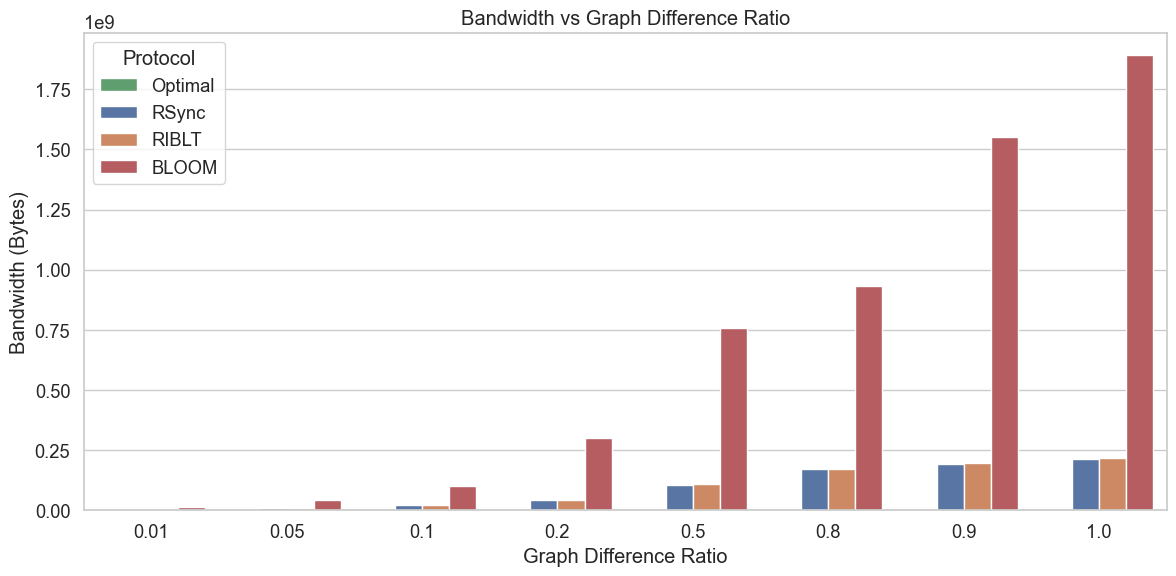

In [539]:
plt.figure(figsize=(12, 6))



ax = sns.barplot(data=df, x="diff", y="bandwidth", hue="method", errorbar=None, hue_order=order, palette=palette)

plt.ylabel("Bandwidth (Bytes)")
plt.xlabel("Graph Difference Ratio")
legend = plt.legend()
legend.set_title("Protocol")
plt.title("Bandwidth vs Graph Difference Ratio")
# ax.set_yscale("log")
plt.tight_layout()
plt.savefig("bandwidth.pdf", bbox_inches="tight")
plt.show()

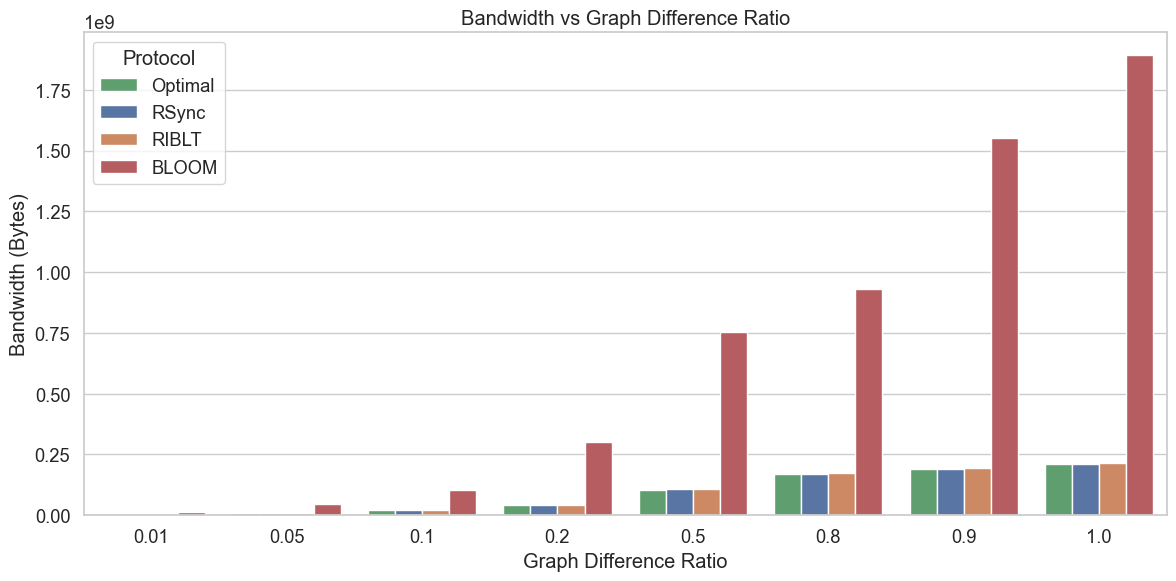

In [571]:

df_delta = df.groupby("diff")["delta"].first().reset_index()
df_delta["category"] = "Optimal"
df_delta["value"] = df_delta["delta"]

df_bw = df[["diff", "method", "bandwidth"]].copy()
df_bw["category"] = df_bw["method"]
df_bw["value"] = df_bw["bandwidth"]

df_plot = pd.concat([
    df_bw[["diff", "category", "value"]],
    df_delta[["diff", "category", "value"]]
])

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df_plot,
    x="diff",
    y="value",
    hue="category",
    errorbar=None,
    hue_order=order,
    palette=palette
)

plt.title("")
plt.ylabel("Bandwidth (Bytes)")
plt.xlabel("Graph Difference Ratio")
legend = plt.legend()
legend.set_title("Protocol")
#ax.set_yscale("log")
plt.tight_layout()
plt.title("Bandwidth vs Graph Difference Ratio")
plt.savefig("bandwidth_all.pdf", bbox_inches="tight")
plt.show()

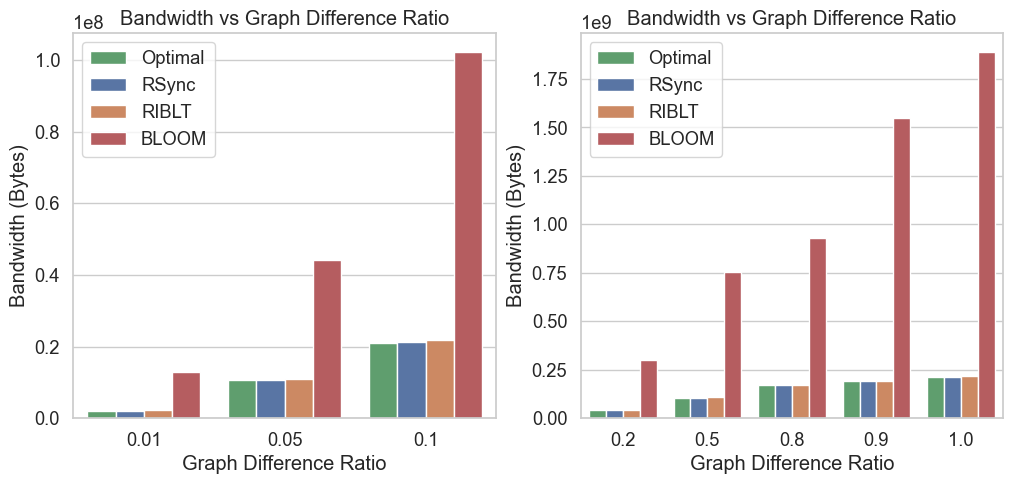

In [584]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_delta = df.groupby("diff")["delta"].first().reset_index()
df_delta["category"] = "Optimal"
df_delta["value"] = df_delta["delta"]

df_bw = df[["diff", "method", "bandwidth"]].copy()
df_bw["category"] = df_bw["method"]
df_bw["value"] = df_bw["bandwidth"]

df_plot = pd.concat([
    df_bw[["diff", "category", "value"]],
    df_delta[["diff", "category", "value"]]
])

d1 = df_plot[df_plot["diff"] < 0.2]
d2 = df_plot[df_plot["diff"] >= 0.2]


ax = sns.barplot(
    data=d1,
    x="diff",
    y="value",
    hue="category",
    errorbar=None,
    hue_order=order,
    palette=palette,
    ax=axes[0]
)

ax = sns.barplot(
    data=d2,
    x="diff",
    y="value",
    hue="category",
    errorbar=None,
    hue_order=order,
    palette=palette,
    ax=axes[1]
)

axes[0].set_ylabel("Bandwidth (Bytes)")
axes[0].set_xlabel("Graph Difference Ratio")
axes[0].legend(title="")

axes[1].set_ylabel("Bandwidth (Bytes)")
axes[1].set_xlabel("Graph Difference Ratio")
axes[1].legend(title="")
#ax.set_yscale("log")
axes[0].set_title("Bandwidth vs Graph Difference Ratio")
axes[1].set_title("Bandwidth vs Graph Difference Ratio")
plt.savefig("bandwidth_all.pdf", bbox_inches="tight")


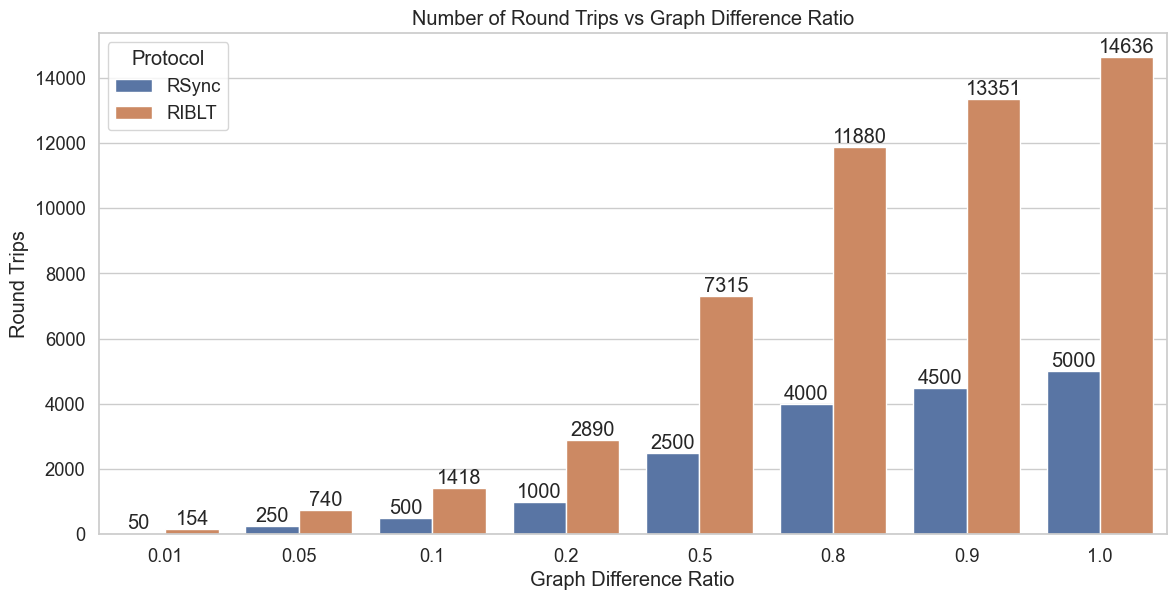

In [585]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df,
    x="diff",
    y="round_trips",
    hue="method",
    errorbar=None,
    hue_order=["RSync", "RIBLT"],
    palette=palette
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.ylabel("Round Trips")
plt.xlabel("Graph Difference Ratio")
legend = plt.legend()
legend.set_title("Protocol")
#ax.set_yscale("log")
plt.tight_layout()
plt.title("Number of Round Trips vs Graph Difference Ratio")
plt.savefig("roundtrips_all_.pdf", bbox_inches="tight")
plt.show()

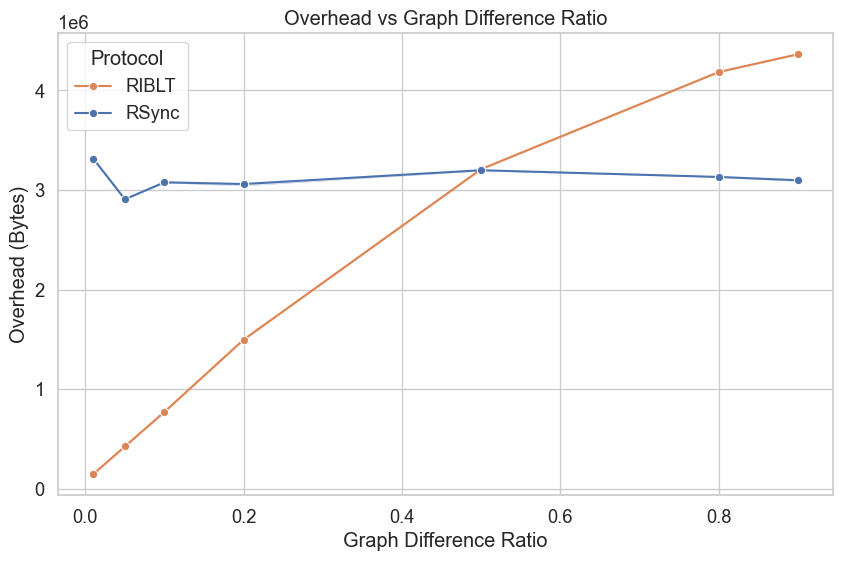

In [558]:
plt.figure(figsize=(10, 6))

d = _df[(_df["diff"] != 1) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]
d1 = df[(df["diff"] != 1) & (df["method"] != "BLOOM") & (df["method"] != "RSyncv2")]
d2 = df[(df["diff"] != 1) & (df["method"] != "BLOOM") & (df["method"] != "RSyncv2")]

a = sns.lineplot(
    data=d,
    x="diff",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False),
    palette=palette,
)

plt.ylabel("Overhead (Bytes)")
plt.xlabel("Graph Difference Ratio")
legend = plt.legend()
legend.set_title("Protocol")

plt.title("Overhead vs Graph Difference Ratio")
plt.savefig("overhead_ratio_vs_graph_diff_ratio.pdf", bbox_inches="tight")

In [457]:
d[(d["method"] == "RSync") & (d["diff"] == 0.01)].overhead_ratio.mean()

np.float64(1.5835319319815189)

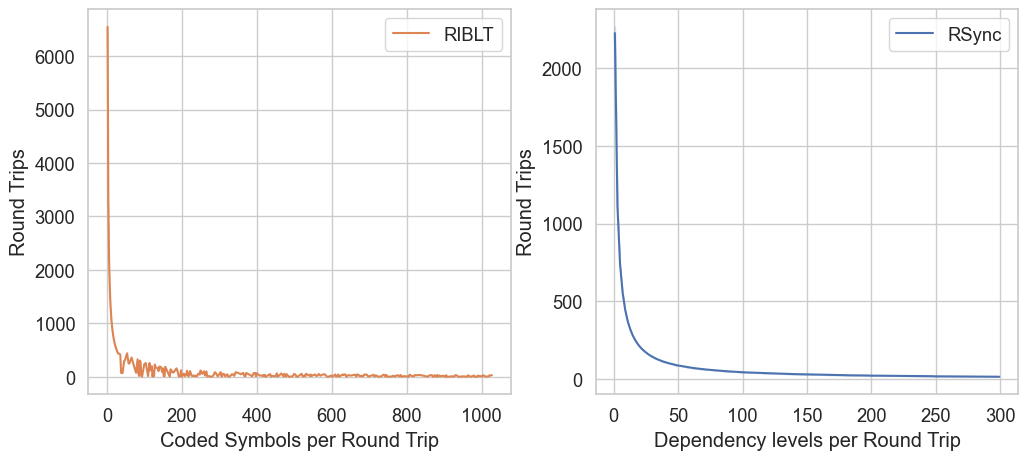

In [458]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

d1 = _df[(_df["coded_symbols_per_round_trip"]) & (_df["method"] == "RIBLT")]
d2 = _df[(_df["coded_symbols_per_round_trip"]) & (_df["method"] == "RSync")]

a = sns.lineplot(
    data=d1,
    x="coded_symbols_per_round_trip",
    y="round_trips",
    hue="method",
    marker=None,
    errorbar=('ci', False),
    ax=axes[0],
    palette=palette
)

a = sns.lineplot(
    data=d2,
    x="coded_symbols_per_round_trip",
    y="round_trips",
    hue="method",
    marker=None,
    errorbar=('ci', False),
    ax=axes[1],
    palette=palette
)

axes[0].set_ylabel("Round Trips")
axes[0].set_xlabel("Coded Symbols per Round Trip")
axes[1].set_ylabel("Round Trips")
axes[1].set_xlabel("Dependency levels per Round Trip")
axes[0].legend(title="")
axes[1].legend(title="")

plt.savefig("number_of_round_trips_vs_msg.pdf", bbox_inches="tight")

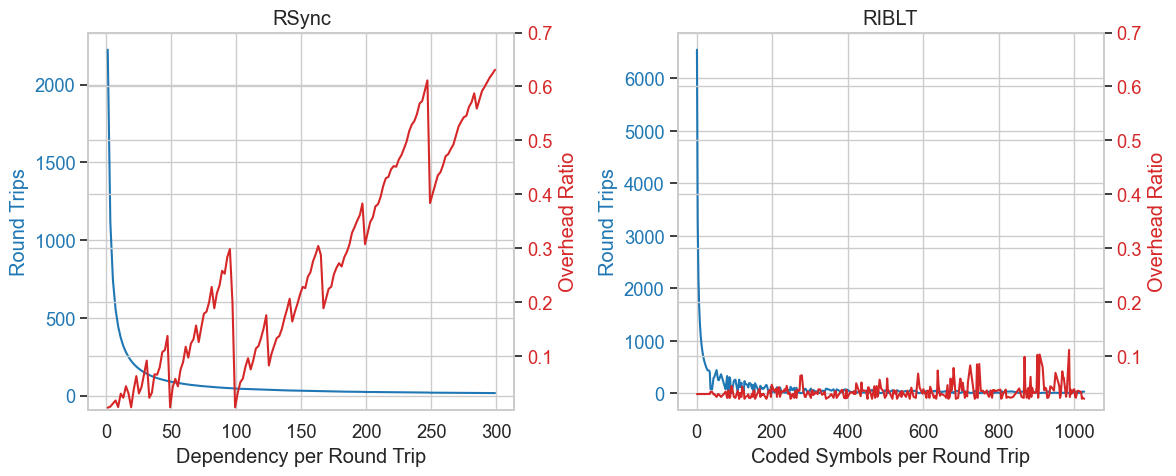

In [459]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

d1 = _df[(_df["coded_symbols_per_round_trip"]) & (_df["method"] == "RSync")]
d2 = _df[(_df["coded_symbols_per_round_trip"]) & (_df["method"] == "RIBLT")]

ymin = min(d1["overhead_ratio"].min(), d2["overhead_ratio"].min())
ymax = max(d1["overhead_ratio"].max(), d2["overhead_ratio"].max())
padding = 0.05 * (ymax - ymin)
ymin -= padding
ymax += padding
ymin = 0.00000001
ymax = 0.7

sns.lineplot(
    data=d1,
    x="coded_symbols_per_round_trip",
    y="round_trips",
    ax=axes[0],
    color="tab:blue",
    errorbar=None
)

axes[0].set_xlabel("Dependency per Round Trip")
axes[0].set_ylabel("Round Trips", color="tab:blue")
axes[0].tick_params(axis="y", labelcolor="tab:blue")
axes[0].set_title("RSync")

# Second Y-axis: overhead
ax2 = axes[0].twinx()

sns.lineplot(
    data=d1,
    x="coded_symbols_per_round_trip",
    y="overhead_ratio",
    ax=ax2,
    color="tab:red",
    errorbar=None
)

ax2.set_ylabel("Overhead Ratio", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ymin, ymax)

sns.lineplot(
    data=d2,
    x="coded_symbols_per_round_trip",
    y="round_trips",
    ax=axes[1],
    color="tab:blue",
    errorbar=None
)

axes[1].set_xlabel("Coded Symbols per Round Trip")
axes[1].set_ylabel("Round Trips", color="tab:blue")
axes[1].tick_params(axis="y", labelcolor="tab:blue")
axes[1].set_title("RIBLT")


# Second Y-axis: overhead
ax2 = axes[1].twinx()

sns.lineplot(
    data=d2,
    x="coded_symbols_per_round_trip",
    y="overhead_ratio",
    ax=ax2,
    color="tab:red",
    errorbar=None,
)

ax2.set_ylabel("Overhead Ratio", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ymin, ymax)

plt.tight_layout()
plt.savefig("rt_and_overhead_vs_msg.pdf", bbox_inches="tight")
plt.show()

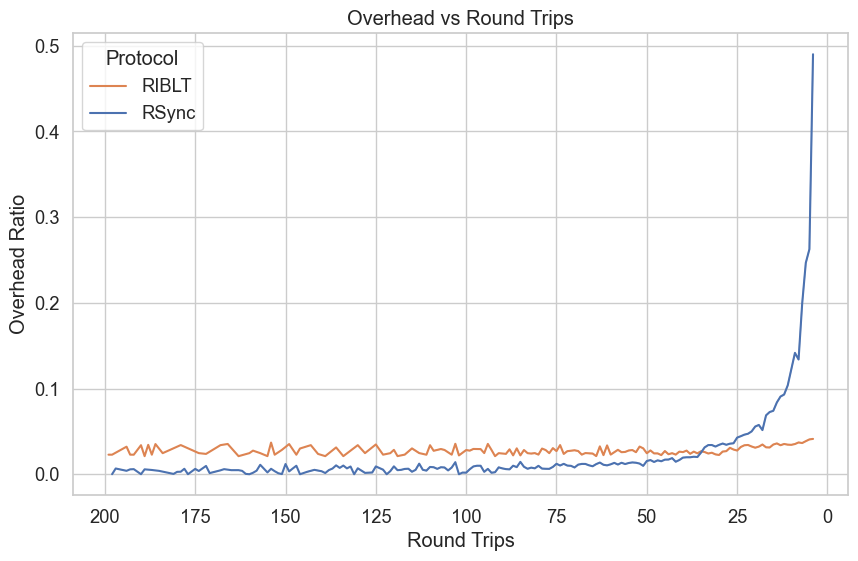

In [460]:
plt.figure(figsize=(10, 6))

d =  _df[(_df["round_trips"] <= 200) & (_df["round_trips"] >= 4) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead_ratio",
    hue="method",
    palette=palette,
    errorbar=('ci', False)
)

plt.title("Overhead vs Round Trips")
plt.ylabel("Overhead Ratio")
plt.xlabel("Round Trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("overhead_vs_roundtrips.pdf", bbox_inches="tight")

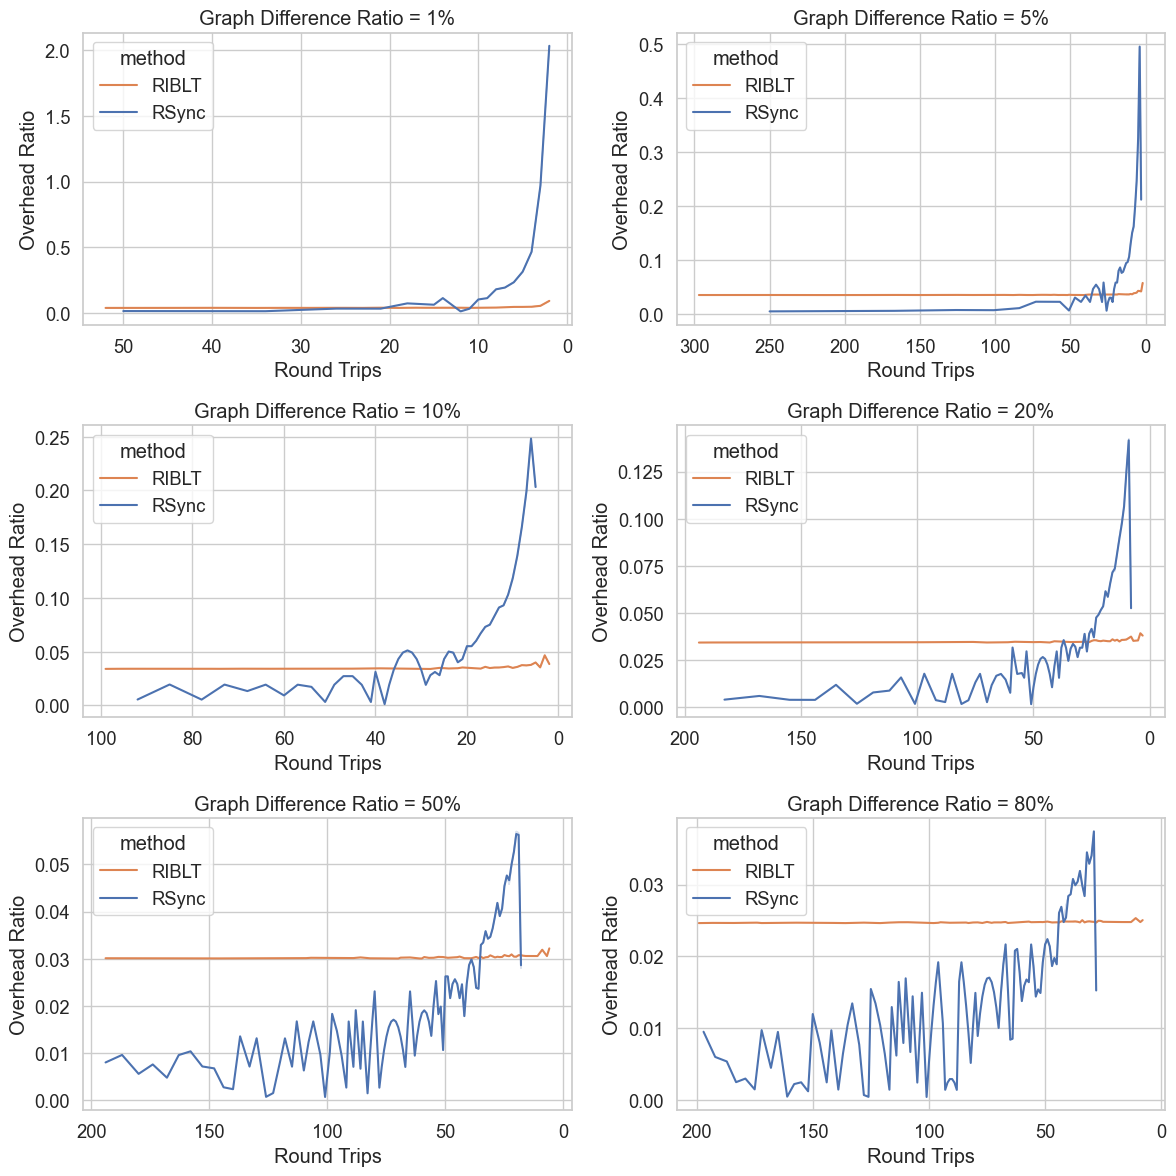

In [461]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

d0 = _df[(_df["diff"] == 0.01) & (_df["round_trips"] <= 55) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]
d1 = _df[(_df["diff"] == 0.05) & (_df["round_trips"] <= 300) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]
d2 = _df[(_df["diff"] == 0.1) & (_df["round_trips"] <= 100) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]
d3 = _df[(_df["diff"] == 0.2) & (_df["round_trips"] <= 200) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]
d4 = _df[(_df["diff"] == 0.5) & (_df["round_trips"] <= 200) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]
d5 = _df[(_df["diff"] == 0.8) & (_df["round_trips"] <= 200) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]
d6 = _df[(_df["diff"] == 0.9) & (_df["round_trips"] <= 1000) & (_df["method"] != "BLOOM") & (_df["method"] != "RSyncv2")]

p0 = sns.lineplot(data=d0, x="round_trips", y="overhead_ratio", hue="method", errorbar=('ci', False), palette=palette, ax=axes[0, 0])
p1 = sns.lineplot(data=d1, x="round_trips", y="overhead_ratio", hue="method", errorbar=('ci', False), palette=palette, ax=axes[0, 1])
p2 = sns.lineplot(data=d2, x="round_trips", y="overhead_ratio", hue="method", errorbar=('ci', False), palette=palette, ax=axes[1, 0])
p3 = sns.lineplot(data=d3, x="round_trips", y="overhead_ratio", hue="method", errorbar=('ci', False), palette=palette, ax=axes[1, 1])
p4 = sns.lineplot(data=d4, x="round_trips", y="overhead_ratio", hue="method", errorbar=('ci', False), palette=palette, ax=axes[2, 0])
p5 = sns.lineplot(data=d5, x="round_trips", y="overhead_ratio", hue="method", errorbar=('ci', False), palette=palette, ax=axes[2, 1])

axs = [p0, p1, p2, p3, p4, p5]
diff = ["1", "5", "10", "20", "50", "80"]
for i, x in enumerate(axs):
    x.invert_xaxis()
    x.set_xlabel("Round Trips")
    x.set_ylabel("Overhead Ratio")
    x.set_title(f"Graph Difference Ratio = {diff[i]}%")

plt.tight_layout()
plt.savefig("overhead_vs_roundtrips_all.pdf", bbox_inches="tight")
plt.show()

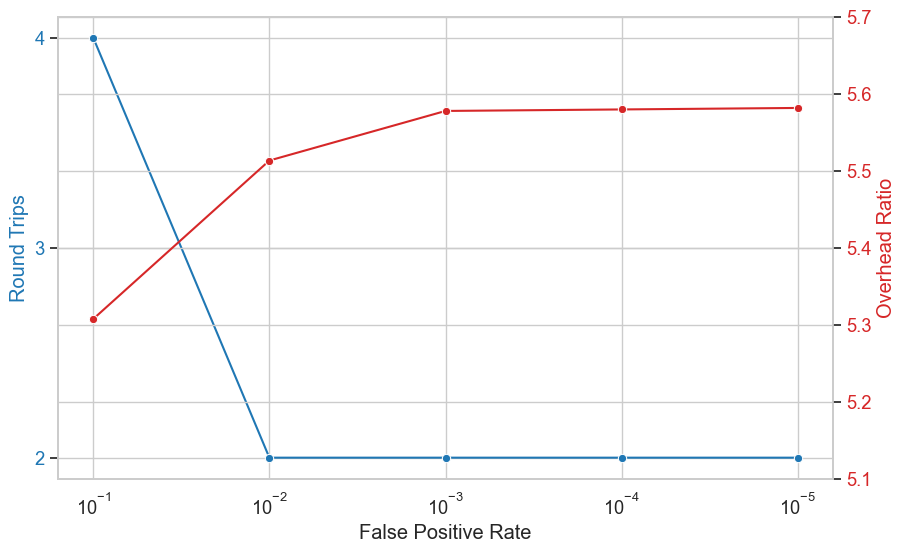

In [462]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(10, 6))

d = _df[(_df["method"] == "BLOOM")]

ymin = 5.1
ymax = 5.7

a = sns.lineplot(
    data=d,
    x="fp",
    y="round_trips",
    color="tab:blue",
    marker="o",
    errorbar=None,
    estimator="max"
)

a.set_xlabel("False Positive Rate")
a.set_ylabel("Round Trips", color="tab:blue")
a.tick_params(axis="y", labelcolor="tab:blue")
a.invert_xaxis()
a.set_xscale("log")
a.yaxis.set_major_locator(MaxNLocator(integer=True))


# Second Y-axis: overhead
ax2 = a.twinx()

sns.lineplot(
    data=d,
    x="fp",
    y="overhead_ratio",
    ax=ax2,
    marker="o",
    color="tab:red",
    errorbar=None
)

ax2.set_ylabel("Overhead Ratio", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ymin, ymax)



plt.title("")
plt.savefig("bloom_fp_vs_round_trips_and_overhead_ratio.pdf", bbox_inches="tight")

In [463]:
_df[(_df["method"] == "RSync") & (_df["overhead_ratio"] > 2)]


,method,graph_size,diff,round_trips,bandwidth,delta,coded_symbols_per_round_trip,delta_size_mult,fp,bloom_failed,overhead,overhead_ratio,bandwidth_bin
528,RSync,10000,0.01,2,6300264,2093303,197,10,-1.0,-1,4206961,2.009724,"(222102.182, 380563109.6]"
530,RSync,10000,0.01,2,6342546,2093303,198,10,-1.0,-1,4249243,2.029923,"(222102.182, 380563109.6]"
532,RSync,10000,0.01,2,6384828,2093303,199,10,-1.0,-1,4291525,2.050121,"(222102.182, 380563109.6]"
534,RSync,10000,0.01,2,6427110,2093303,200,10,-1.0,-1,4333807,2.070320,"(222102.182, 380563109.6]"
536,RSync,10000,0.01,2,6469392,2093303,201,10,-1.0,-1,4376089,2.090519,"(222102.182, 380563109.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,RSync,10000,0.01,2,10443900,2093303,295,10,-1.0,-1,8350597,3.989196,"(222102.182, 380563109.6]"
726,RSync,10000,0.01,2,10486182,2093303,296,10,-1.0,-1,8392879,4.009395,"(222102.182, 380563109.6]"
728,RSync,10000,0.01,2,10528464,2093303,297,10,-1.0,-1,8435161,4.029594,"(222102.182, 380563109.6]"
730,RSync,10000,0.01,2,10570746,2093303,298,10,-1.0,-1,8477443,4.049793,"(222102.182, 380563109.6]"


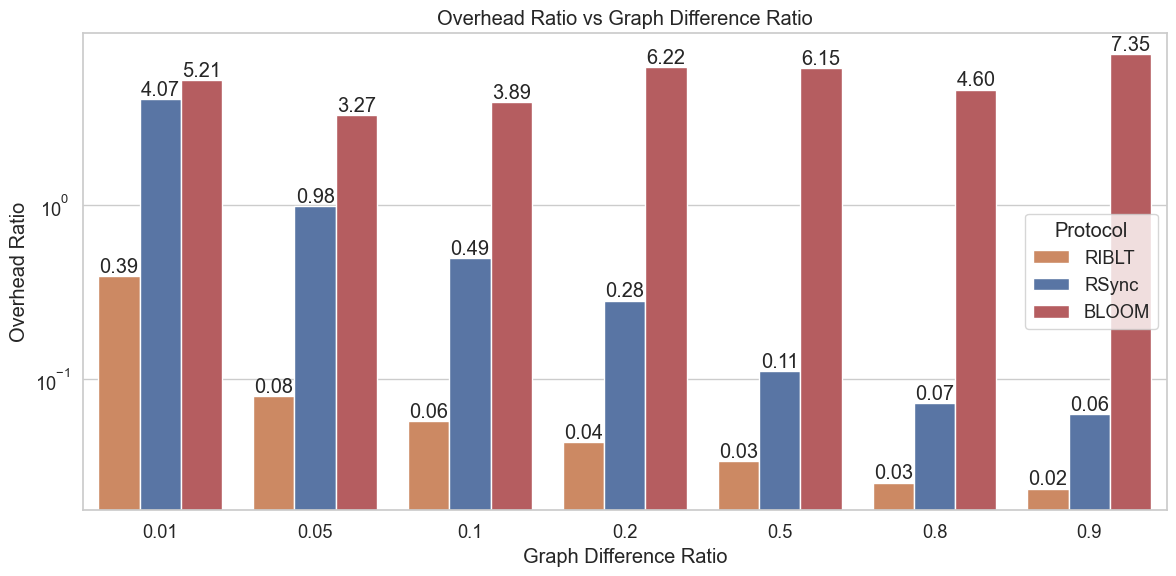

In [483]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 6))

d = _df[(_df["diff"] != 1)]

ax = sns.barplot(data=d, x="diff", y="overhead_ratio", hue="method", errorbar=None, hue_order=["RIBLT", "RSync", "BLOOM"], palette=palette,
                    estimator="max"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.ylabel("Overhead Ratio")
plt.xlabel("Graph Difference Ratio")
legend = plt.legend()
legend.set_title("Protocol")
plt.title("Overhead Ratio vs Graph Difference Ratio")
ax.set_yscale("log")

plt.tight_layout()
plt.savefig("overhead_ratio_.pdf", bbox_inches="tight")
plt.show()

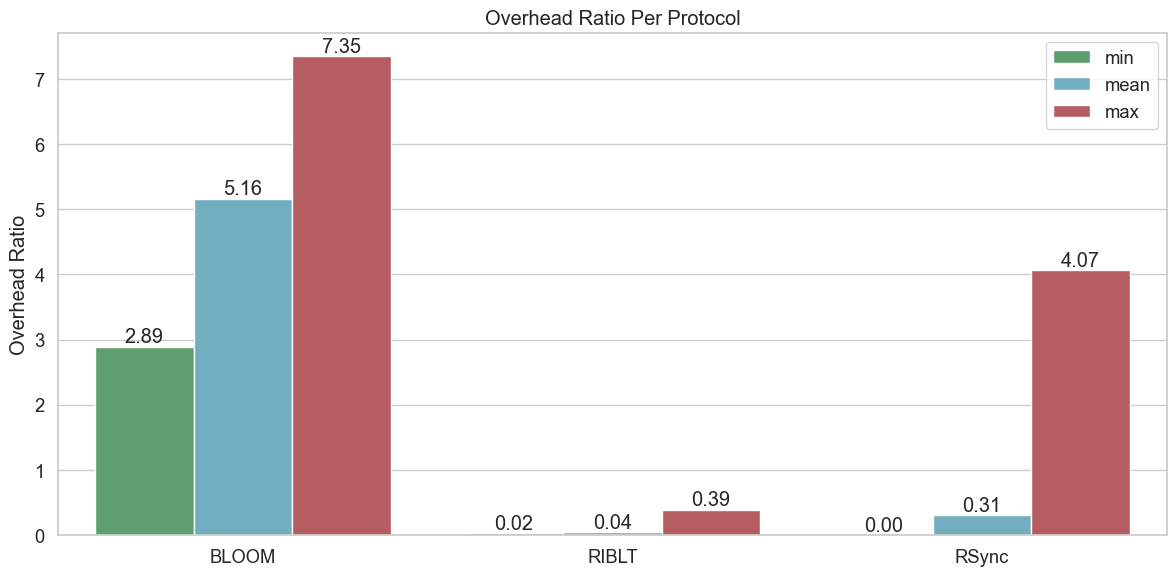

In [586]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 6))

d = _df[(_df["diff"] != 1) & (_df["method"] != "RSyncv2")]

summary = d.groupby('method')['overhead_ratio'].agg(['min','mean','max']).reset_index()

summary_long = summary.melt(
    id_vars='method', 
    value_vars=['min','mean','max'], 
    var_name='estimator', 
    value_name='overhead_ratio'
)

ax = sns.barplot(
    data=summary_long,
    x='method',
    y='overhead_ratio',
    hue='estimator',
    hue_order=['min','mean','max'], 
    palette=['#55a868','#64b5cd','#c44e52'],
    errorbar=None
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.ylabel("Overhead Ratio")
plt.xlabel("")
legend = plt.legend()
legend.set_title("")
plt.title("Overhead Ratio Per Protocol")
#ax.set_yscale("log")

plt.tight_layout()
plt.savefig("overhead_ratio_average.pdf", bbox_inches="tight")
plt.show()

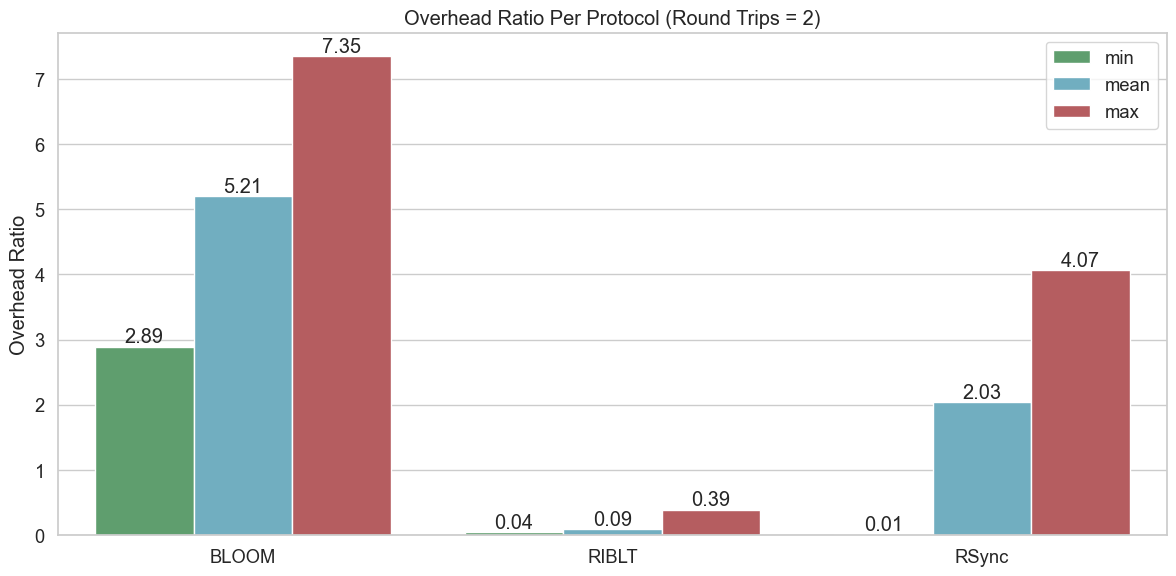

In [587]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 6))

d = _df[(_df["diff"] != 1) & (_df["method"] != "RSyncv2") & (_df["round_trips"] == 2)]

summary = d.groupby('method')['overhead_ratio'].agg(['min','mean','max']).reset_index()

summary_long = summary.melt(
    id_vars='method', 
    value_vars=['min','mean','max'], 
    var_name='estimator', 
    value_name='overhead_ratio'
)

ax = sns.barplot(
    data=summary_long,
    x='method',
    y='overhead_ratio',
    hue='estimator',
    hue_order=['min','mean','max'], 
    palette=['#55a868','#64b5cd','#c44e52'],
    errorbar=None
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.ylabel("Overhead Ratio")
plt.xlabel("")
legend = plt.legend()
legend.set_title("")
plt.title("Overhead Ratio Per Protocol (Round Trips = 2)")
#ax.set_yscale("log")

plt.tight_layout()
plt.savefig("overhead_ratio_average_rt_2.pdf", bbox_inches="tight")
plt.show()

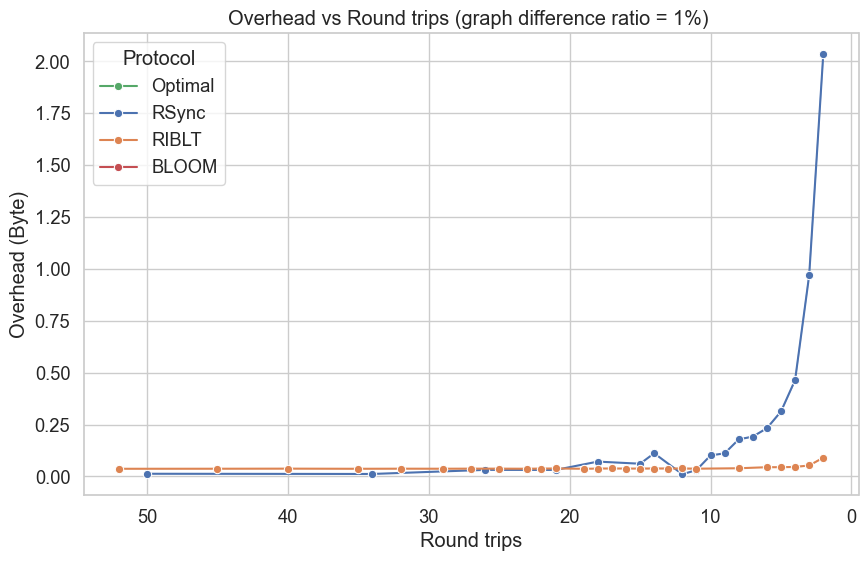

In [295]:
d = _df[(_df["diff"] == 0.01) & (_df["round_trips"] <= 55) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead_ratio",
    hue="method",
    marker="o",
    errorbar=('ci', False),
    hue_order=order,
    palette=palette
)


plt.title("Overhead vs Round trips (graph difference ratio = 1%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_1.pdf")

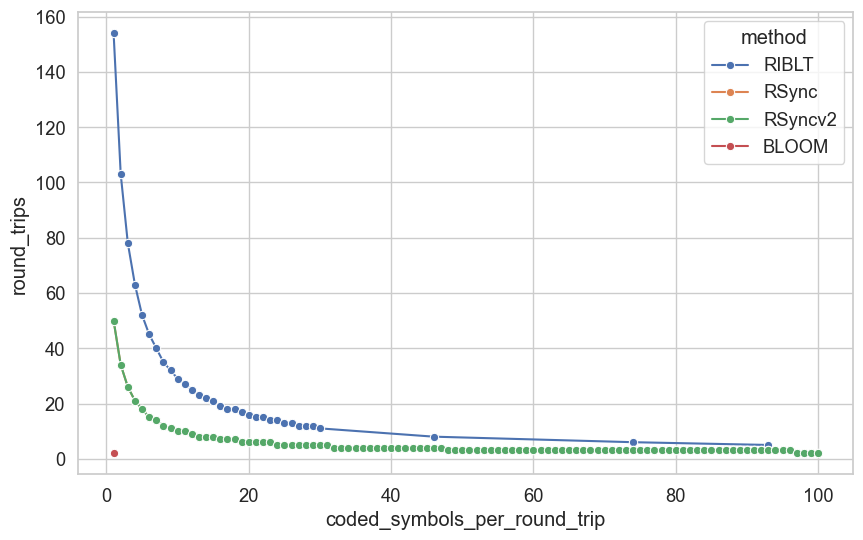

In [146]:
d = _df[(_df["diff"] == 0.01) & (_df["coded_symbols_per_round_trip"] <= 100)]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="coded_symbols_per_round_trip",
    y="round_trips",
    hue="method",
    marker="o",
    errorbar=('ci', False), 
    hue_order=order, 
    palette=palette
)


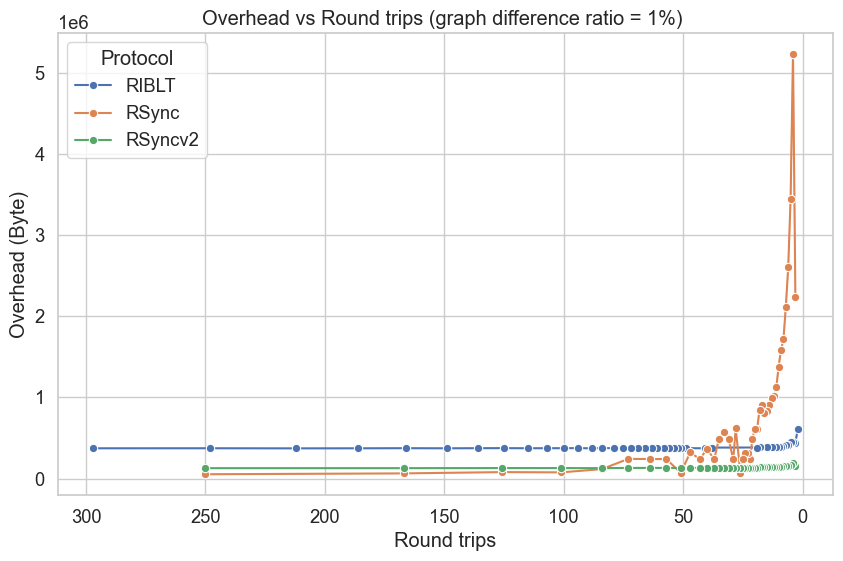

In [147]:
d = _df[(_df["diff"] == 0.05) & (_df["round_trips"] <= 300) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False), 
    hue_order=order, 
    palette=palette
)

plt.title("Overhead vs Round trips (graph difference ratio = 1%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_5.pdf")

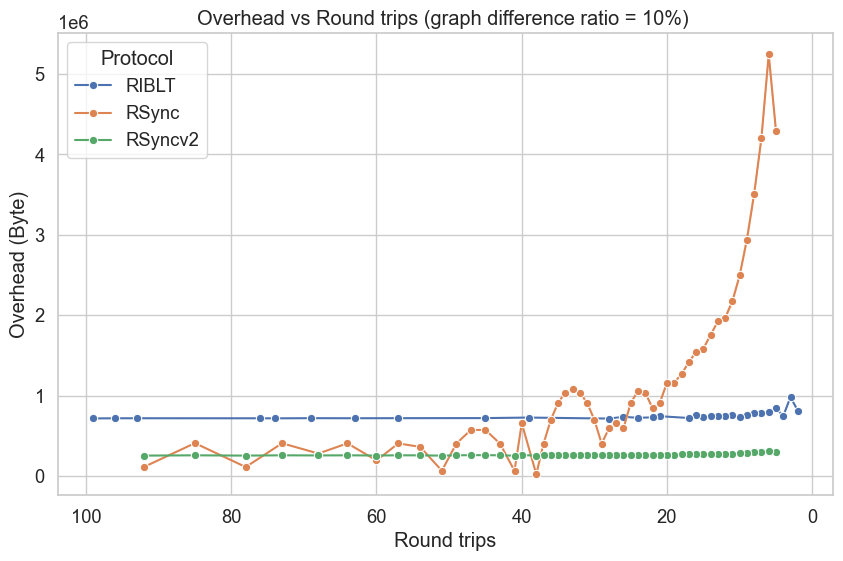

In [148]:
d = _df[(_df["diff"] == 0.1) & (_df["round_trips"] <= 100) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False), 
    hue_order=order, 
    palette=palette
)

plt.title("Overhead vs Round trips (graph difference ratio = 10%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_10.pdf")

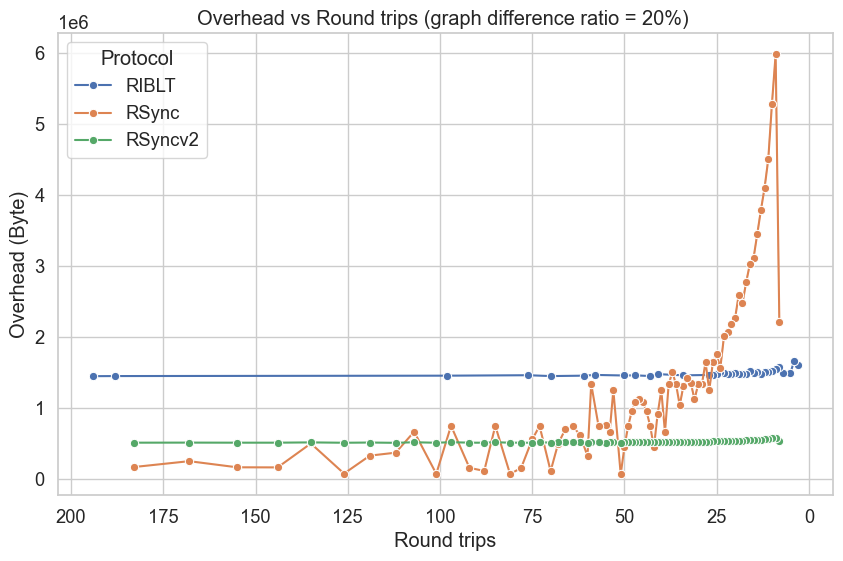

In [149]:
d = _df[(_df["diff"] == 0.2) & (_df["round_trips"] <= 200) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 20%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_20.pdf")

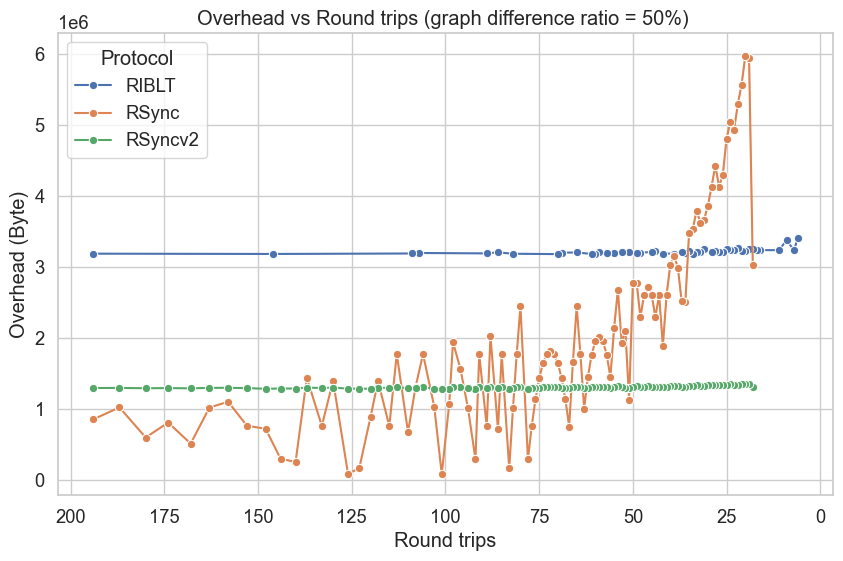

In [150]:
d = _df[(_df["diff"] == 0.5) & (_df["round_trips"] <= 200) & (_df["method"] != "BLOOM")]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 50%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_50.pdf")

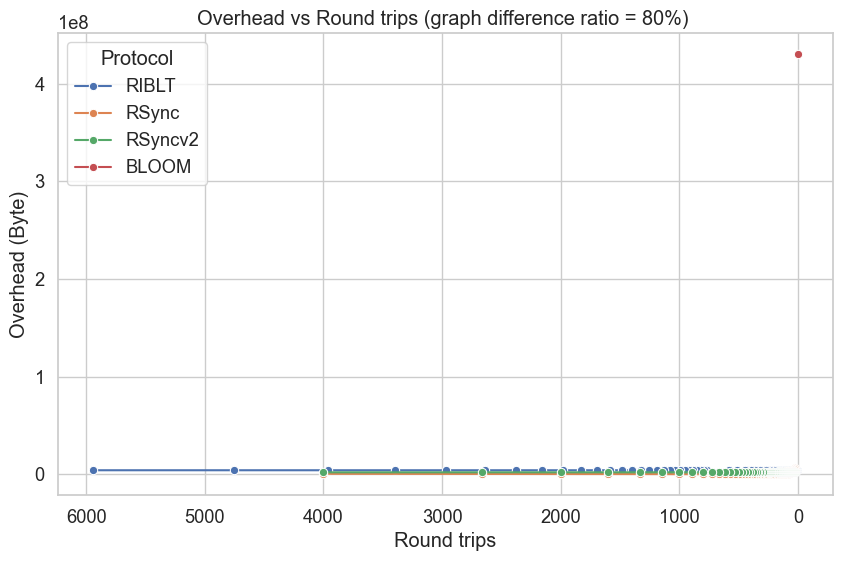

In [151]:
d = _df[(_df["diff"] == 0.8) & (_df["round_trips"] <= 7000)]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 80%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_80.pdf")

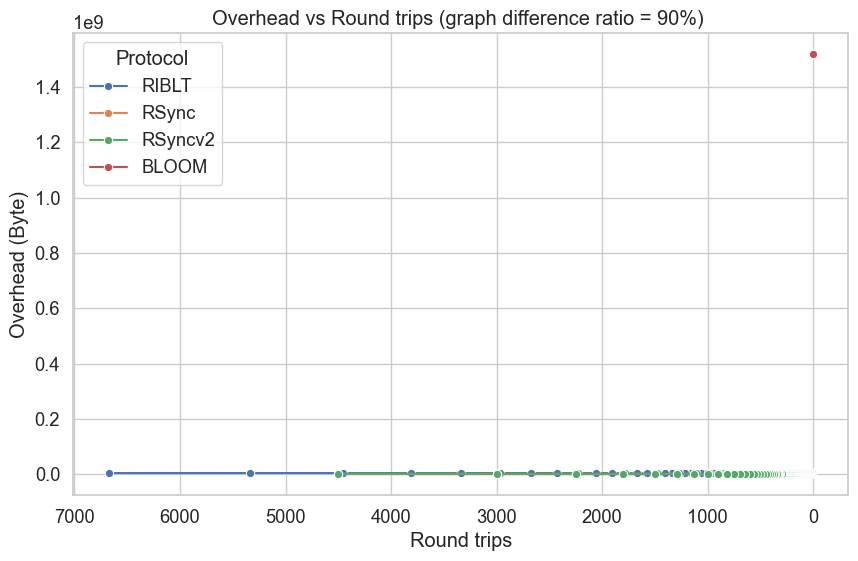

In [152]:
d = _df[(_df["diff"] == 0.9) & (_df["round_trips"] <= 7000)]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 90%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_90.pdf")

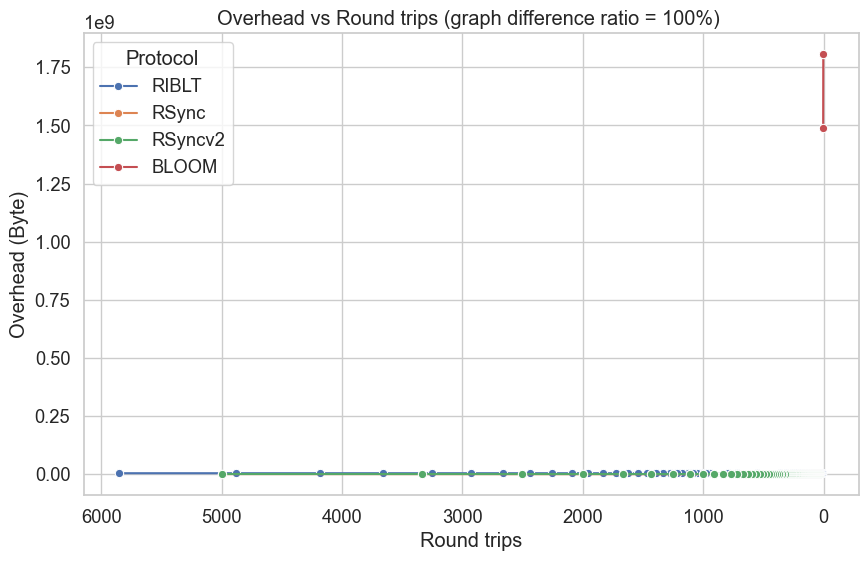

In [153]:
d = _df[(_df["diff"] == 1) & (_df["round_trips"] <= 7000)]
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=d,
    x="round_trips",
    y="overhead",
    hue="method",
    marker="o",
    errorbar=('ci', False)
)

plt.title("Overhead vs Round trips (graph difference ratio = 100%) ")
plt.ylabel("Overhead (Byte)")
plt.xlabel("Round trips")
legend = plt.legend()
legend.set_title("Protocol")
ax.invert_xaxis()
plt.savefig("round_trips_100.pdf")